### How to read SSH data from redmar-CICESE stations

http://redmar.cicese.mx

Useful stations are:

|Code|Station|Lat|Lon|
|:--:|:--:|:--:|:-:|
|ENSM|Ensenada| 31°50.894'N | 116°37.067'W|
|SNQN|San Quintín|30°29'4.23"N | 115°58'38.95"W|
|ICDN|Isla de Cedros|28°5.760'N|115°10.992'W|
|GROM|Guerrero Negro|27° 53' N |114° 09' W|
|LPAZ|La Paz|24° 10' N|110° 21' W|

![](figures/estaciones_redmar.png)

### Metadata

Centro de Investigacion Cientifica y de Educacion Superior de Ensenada
   
                  Laboaratorio del Nivel del Mar
                    Red Mareografica de CICESE
   
                       FORMATO DE DATOS
        Estaciones Mareograficas Meteorologicas Costeras (EMMC)
   
                       Zona de tiempo: GMT

|Col|  Variable          |       Unidades | Equipo|
|:--:|:--:|:--:|:--:|
|1  |  Anio   |                   -||
|2  |  Mes    |                  -||
|3  |  Dia    |                  -||
|4  |  Hora   |                  -||
|5  |  Minuto |                  -||
|6  |  Segundo |                 -||
|7  |  ID Estacion |             -||
|8  |  Voltaje sistema   |       V |         datalogger+sensores+radios|
|9  |  Nivel del mar |           m  |        sensor de presion sumergido Leveltrol 700|
|10 |  Nivel del mar |           m  |        sensor de presion burbujeador OTT-CBS|
|11 |  Switch1   |               -  |        switch de flotador superior|
|12 |  Switch2   |               -  |        switch de flotador inferior|
|13 |  Temperatura Agua  |       grados(C)|  sensor de temperatura 109SS-L|
|14 |  Nivel del mar   |         m        |  radar OTT-RSL|
|15 |  Radiacion Solar |         W/m^2    |  piranometro SP-212 ( no funcionando actualmente)|
|16 |  Direccion Viento |        Azimut   |  Vaisala WXT520|
|17 |  Magnitud Viento |         m/s      |  Vaisala WXT520|
|18 |  Temperatura Aire |        grados(C)|  Vaisala WXT520|
|19 |  Humedad Relativa  |       %        | Vaisala WXT520|
|20 |  Presion Atmosferica |     mb      |   Vaisala WXT520|
|21 |  Precipitacion  |          mm      |   Vaisala WXT520|
|22 |  Voltaje estac. meteor. |  V       |   Vaisala WXT520|
|23 |  Nivel del Mar       |     m       |   radar Sutron R|

Nota: Texto escrito sin acentos


<<Reactivacion del Sensor de Temperatura del Mar el día 3/Dic/2018>>

In [2]:
import cmocean as cmo
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def get_redmar_dataframe(filename):
    '''Get a dataframe from a REDMAR data file indexed by date '''
    col_names = ['year','month', 'day', 'hour','minute','second','ID', 'voltage','ssh_leveltrol','ssh_burbujeador',
             'switch1','switch2', 'water_temp','ssh_radar','solar_radiation','wind_dir','wind_speed',
             'air_temp','rel_humidity','atm_pressure', 'precipitation', 'voltage_station', 'ssh_radar_sutron']
    data = pd.read_csv(filename, delim_whitespace=True, names = col_names )
    data['datetime'] = pd.to_datetime(data[['year', 'month', 'day','hour','minute','second']])
    return(data.set_index('datetime'))

In [4]:
filename = '../datos_mareografos/cicese/ICDN/ICDN-141128.dat'
df = get_redmar_dataframe(filename)

In [5]:
df

,year,month,day,hour,minute,second,ID,voltage,ssh_leveltrol,ssh_burbujeador,...,ssh_radar,solar_radiation,wind_dir,wind_speed,air_temp,rel_humidity,atm_pressure,precipitation,voltage_station,ssh_radar_sutron
datetime,,,,,,,,,,,,,,,,,,,,,
2014-11-28 00:05:00,2014,11,28,0,5,0,113,12.39,0.0,2.093,...,0.0,130.0,239,1.4,24.8,39.5,1013.80,0.0,12.7,6.052
2014-11-28 00:06:00,2014,11,28,0,6,0,113,12.39,0.0,2.099,...,0.0,126.8,247,1.3,24.8,40.2,1013.84,0.0,12.7,6.042
2014-11-28 00:07:00,2014,11,28,0,7,0,113,12.39,0.0,2.070,...,0.0,123.4,238,1.5,24.8,42.5,1013.87,0.0,12.7,6.035
2014-11-28 00:08:00,2014,11,28,0,8,0,113,12.39,0.0,2.072,...,0.0,120.1,245,1.7,24.8,43.4,1013.90,0.0,12.7,6.035
2014-11-28 00:09:00,2014,11,28,0,9,0,113,12.39,0.0,2.078,...,0.0,116.4,244,1.5,24.8,44.4,1013.90,0.0,12.7,6.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-28 16:03:00,2014,11,28,16,3,0,113,12.11,0.0,2.553,...,0.0,354.1,208,1.3,21.6,58.0,1014.50,0.0,12.5,6.469
2014-11-28 16:04:00,2014,11,28,16,4,0,113,12.10,0.0,2.555,...,0.0,356.5,207,1.3,21.6,58.2,1014.50,0.0,12.5,6.506
2014-11-28 16:22:00,2014,11,28,16,22,0,113,12.11,0.0,2.584,...,0.0,411.6,211,1.7,21.5,60.2,1014.60,0.0,12.5,6.484


Text(0, 0.5, 'ssh / m')

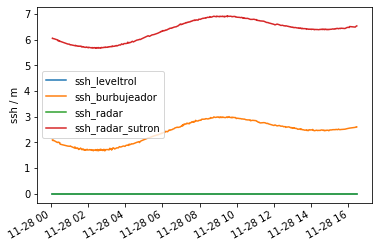

In [6]:
df['ssh_leveltrol'].plot()
df['ssh_burbujeador'].plot()
df['ssh_radar'].plot()
df['ssh_radar_sutron'].plot()
plt.legend()
plt.xlabel('')
plt.ylabel('ssh / m')